<a href="https://colab.research.google.com/github/saaim-ansari/Machine_Learning_MPR/blob/main/ResearchPaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-4ac8132f2187>:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)  # Replace NaNs with mean values


Accuracy: 0.9587


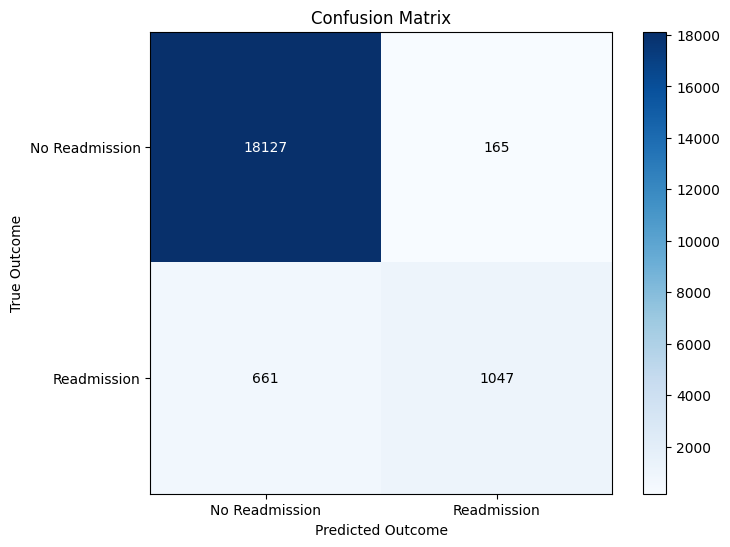

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Step 1: Load the data
data = pd.read_csv('diabetes_prediction_dataset.csv')

# Step 2: Handle missing values
data.fillna(data.mean(), inplace=True)  # Replace NaNs with mean values

# Step 3: Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Step 4: Normalize numerical features
scaler = StandardScaler()
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Step 5: Split the data into training and testing sets
X = data.drop('diabetes', axis=1)
y = data['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 7: Evaluate the Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['No Readmission', 'Readmission'])
plt.yticks([0, 1], ['No Readmission', 'Readmission'])
plt.xlabel('Predicted Outcome')
plt.ylabel('True Outcome')

# Display values in each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.show()


Accuracy: 0.95935
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.92      0.57      0.71      1708

    accuracy                           0.96     20000
   macro avg       0.94      0.78      0.84     20000
weighted avg       0.96      0.96      0.95     20000



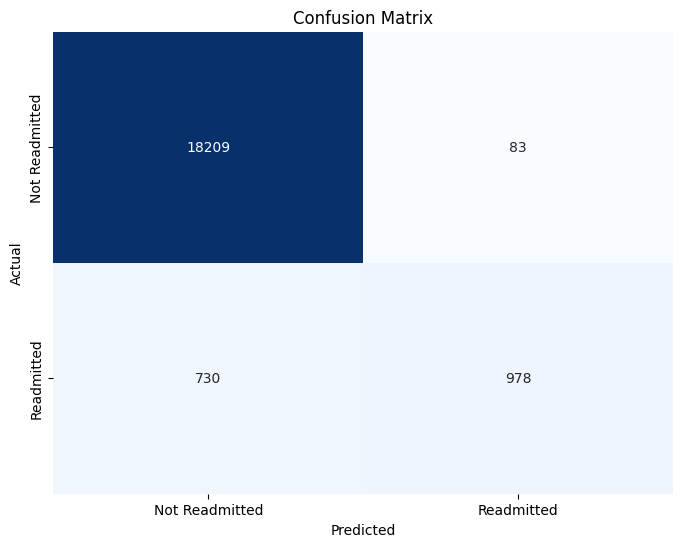

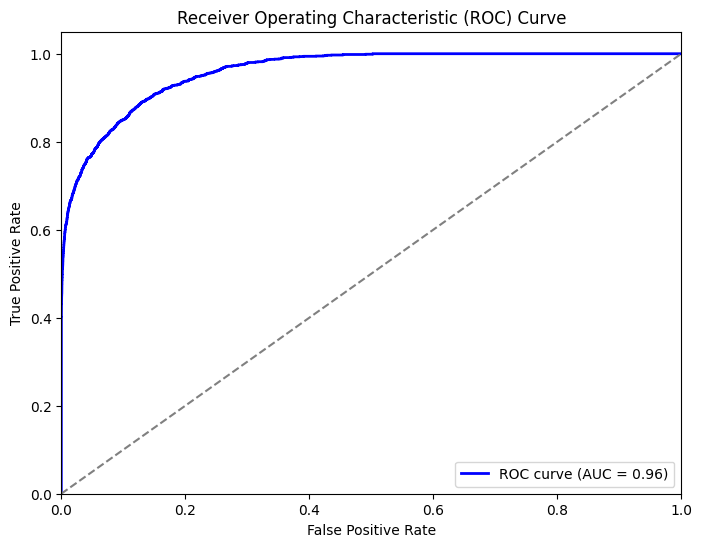

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Load the dataset
data = pd.read_csv("diabetes_prediction_dataset.csv")

# Preprocessing
# Assuming "diabetes" is the target variable
X = data.drop(columns=["diabetes"])  # Features
y = data["diabetes"]  # Target variable

# Convert categorical variables into dummy/indicator variables if needed
X = pd.get_dummies(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))


# Define class labels
class_labels = ['Not Readmitted', 'Readmitted']

# Get predictions
y_pred = svm_model.predict(X_test_scaled)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Get predicted probabilities for class 1
y_prob = svm_model.decision_function(X_test_scaled)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



In [ ]:
!pip install plot_confusion_matrix

In [ ]:
!pip install scikit-learn

Decision Tree Accuracy: 0.9551398474391573
Naive Bayes Accuracy: 0.3011260443152924


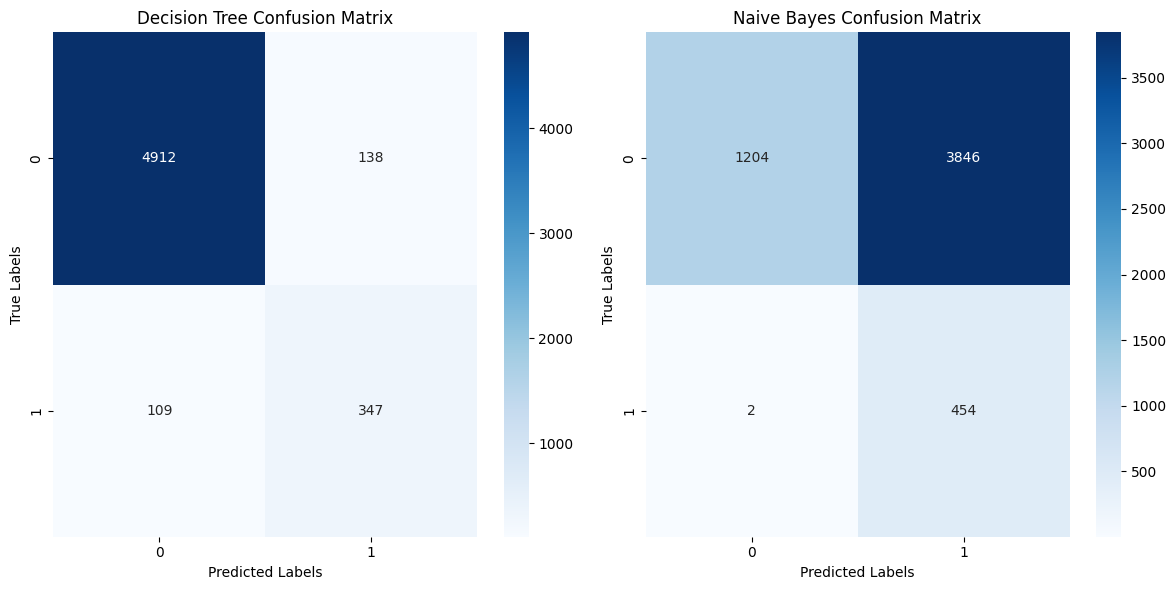

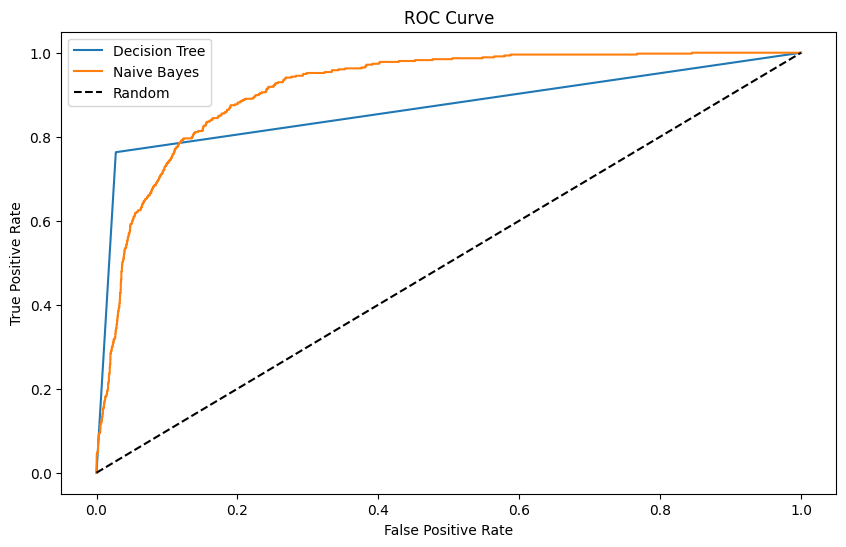

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("diabetes_prediction_dataset.csv")

# Preprocessing
# Assuming 'diabetes' is the target variable

# One-hot encode categorical variables
X = pd.get_dummies(data.drop(columns=['diabetes']))
y = data['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_scaled, y_train)

# Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)

# Accuracy Calculation
dt_accuracy = accuracy_score(y_test, dt_classifier.predict(X_test_scaled))
nb_accuracy = accuracy_score(y_test, nb_classifier.predict(X_test_scaled))
print("Decision Tree Accuracy:", dt_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)

# Confusion Matrix
dt_confusion_matrix = confusion_matrix(y_test, dt_classifier.predict(X_test_scaled))
nb_confusion_matrix = confusion_matrix(y_test, nb_classifier.predict(X_test_scaled))

# Heatmap
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(dt_confusion_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.subplot(1, 2, 2)
sns.heatmap(nb_confusion_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

# ROC Curve
dt_probs = dt_classifier.predict_proba(X_test_scaled)[:, 1]
nb_probs = nb_classifier.predict_proba(X_test_scaled)[:, 1]

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

plt.figure(figsize=(10, 6))
plt.plot(dt_fpr, dt_tpr, label="Decision Tree")
plt.plot(nb_fpr, nb_tpr, label="Naive Bayes")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_combined, y_train)

# Train Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_combined, y_train)

# Train Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_combined, y_train)


GaussianNB()

In [ ]:
# Make predictions using all models
svm_predictions = svm_model.predict(X_test_combined)
decision_tree_predictions = decision_tree_model.predict(X_test_combined)
naive_bayes_predictions = naive_bayes_model.predict(X_test_combined)

# Combine predictions (for example, using voting)
final_predictions = np.mean([svm_predictions, decision_tree_predictions, naive_bayes_predictions], axis=0)

# Evaluate the hybrid model's performance
from sklearn.metrics import accuracy_score
# Round the final predictions to obtain binary values
rounded_predictions = np.round(final_predictions)

# Convert rounded predictions to integers
rounded_predictions = rounded_predictions.astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, rounded_predictions)
print("Accuracy:", accuracy)


Accuracy: 0.9645840900835452


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("diabetes_prediction_dataset.csv")

# Encode categorical variables
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['smoking_history'] = label_encoder.fit_transform(data['smoking_history'])

# Separate features and target variable
X = data.drop(columns=['diabetes'])
y = data['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset from CSV
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=["gender", "smoking_history"])

# Split features and target variable
X = df.drop(columns=["diabetes"])
y = df["diabetes"]

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train decision tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_scaled, y_train)
decision_tree_pred = decision_tree_model.predict_proba(X_test_scaled)[:, 1]

# Train logistic regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_scaled, y_train)
logistic_regression_pred = logistic_regression_model.predict_proba(X_test_scaled)[:, 1]

# Find optimal weights using grid search
best_accuracy = 0
best_weights = None
for decision_tree_weight in range(1, 10):
    for logistic_regression_weight in range(1, 10):
        decision_tree_weight /= 10
        logistic_regression_weight /= 10

        # Combine predictions using weighted averages
        combined_pred = (decision_tree_weight * decision_tree_pred) + (logistic_regression_weight * logistic_regression_pred)

        # Convert probabilities to binary predictions
        combined_pred_binary = (combined_pred > 0.5).astype(int)

        # Evaluate performance
        accuracy_combined = accuracy_score(y_test, combined_pred_binary)

        # Update best accuracy and weights
        if accuracy_combined > best_accuracy:
            best_accuracy = accuracy_combined
            best_weights = (decision_tree_weight, logistic_regression_weight)

print("Best Accuracy:", best_accuracy)
print("Best Weights (Decision Tree, Logistic Regression):", best_weights)


Best Accuracy: 0.9636759898292772
Best Weights (Decision Tree, Logistic Regression): (1.0000000000000003e-09, 0.9)


In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
data = pd.read_csv("diabetes_prediction_dataset.csv", nrows=1000)

# Drop rows with missing values
data.dropna(inplace=True)

# Encode categorical variables
encoder = LabelEncoder()
data['gender'] = encoder.fit_transform(data['gender'])
data['smoking_history'] = encoder.fit_transform(data['smoking_history'])

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(scaled_data)

# Silhouette score
score = silhouette_score(scaled_data, clusters)
print("Silhouette Score:", score)



Silhouette Score: -0.14874698828290436


In [ ]:
import pandas as pd
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Limit dataset size to 1000 entries
df = df.head(1000)

# Drop the 'diabetes' column for clustering
X = df.drop(columns=['diabetes'])

# Preprocess categorical variables
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])


# Fine-tune parameter for Affinity Propagation
best_silhouette_score_affinity = -1
best_preference = 0
for preference in [-50, -100, -150]:
    affinity_propagation = AffinityPropagation(preference=preference)
    clusters_affinity = affinity_propagation.fit_predict(X)
    silhouette_score_affinity = silhouette_score(X, clusters_affinity)
    if silhouette_score_affinity > best_silhouette_score_affinity:
        best_silhouette_score_affinity = silhouette_score_affinity
        best_preference = preference

print("Best Silhouette Score (Affinity Propagation):", best_silhouette_score_affinity)
print("Best preference:", best_preference)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Best Silhouette Score (Affinity Propagation): 0.28577454331503926
Best preference: -150


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import AffinityPropagation
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define chunk size
chunk_size = 1000

# Initialize lists to store results
X_combined_list = []
y_list = []

# Read the dataset in chunks
for chunk in pd.read_csv("diabetes_prediction_dataset.csv", chunksize=chunk_size):
    # Select the first 10,000 columns
    chunk = chunk.iloc[:, :10000]

    # Encode categorical variables using one-hot encoding
    chunk_encoded = pd.get_dummies(chunk, columns=['gender', 'smoking_history'])

    # Separate features and target variable
    X = chunk_encoded.drop(columns=['diabetes'])
    y = chunk_encoded['diabetes']

    # Step 1: Cluster the data using Affinity Propagation
    affinity_propagation = AffinityPropagation()
    clusters = affinity_propagation.fit_predict(X)

    # Step 2: Assign cluster labels
    X_clustered = X.copy()
    X_clustered['cluster'] = clusters

    # Step 3: Encode cluster labels
    encoder = OneHotEncoder(sparse=False)
    cluster_labels_encoded = encoder.fit_transform(X_clustered[['cluster']])

    # Step 4: Combine with original features
    X_combined_chunk = np.concatenate((X, cluster_labels_encoded), axis=1)

    # Append chunk results to lists
    X_combined_list.append(X_combined_chunk)
    y_list.append(y)

# Ensure all chunks have the same number of features
max_features = max(X_combined_chunk.shape[1] for X_combined_chunk in X_combined_list)
X_combined_list = [np.pad(X_combined_chunk, ((0, 0), (0, max_features - X_combined_chunk.shape[1])), mode='constant') for X_combined_chunk in X_combined_list]

# Concatenate results from all chunks
X_combined = np.concatenate(X_combined_list, axis=0)
y = pd.concat(y_list, axis=0)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Train logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Evaluate performance
y_pred = logreg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

Accuracy: 0.95755


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Read the CSV file in chunks
chunk_size = 1000
df_chunks = pd.read_csv('diabetes_prediction_dataset.csv', chunksize=chunk_size)

# Initialize empty lists to store results from each chunk
X_combined_list = []
y_list = []

# Process each chunk
for chunk in df_chunks:
    # Drop irrelevant columns
    chunk = chunk.drop(columns=['gender', 'smoking_history'])

    # One-hot encode categorical columns
    chunk_encoded = pd.get_dummies(chunk, columns=['diabetes'])

    # Check if 'diabetes_0' and 'diabetes_1' columns exist
    if 'diabetes_0' not in chunk_encoded.columns or 'diabetes_1' not in chunk_encoded.columns:
        # Add target columns
        chunk_encoded['diabetes_0'] = np.where(chunk_encoded['diabetes'] == 0, 1, 0)
        chunk_encoded['diabetes_1'] = np.where(chunk_encoded['diabetes'] == 1, 1, 0)

    # Separate features and target variable
    X = chunk_encoded.drop(columns=['diabetes_0', 'diabetes_1'])
    y = chunk_encoded[['diabetes_0', 'diabetes_1']]

    # Cluster the data using Affinity Propagation
    affinity_propagation = AffinityPropagation()
    clusters = affinity_propagation.fit_predict(X)

    # Encode cluster labels
    encoder = OneHotEncoder(sparse=False)
    cluster_labels_encoded = encoder.fit_transform(clusters.reshape(-1, 1))

    # Combine original features with cluster labels
    num_features = X.shape[1]
    num_clusters = len(np.unique(clusters))
    num_rows = X.shape[0]
    if num_clusters > 1:  # Only concatenate if there are multiple clusters
        X_combined = np.hstack((X.values, np.zeros((num_rows, num_clusters))))
        for i in range(num_rows):
            X_combined[i, num_features + clusters[i]] = 1
    else:  # If only one cluster, all rows belong to that cluster
        X_combined = np.hstack((X.values, np.ones((num_rows, 1))))

    # Append results to lists
    X_combined_list.append(X_combined)
    y_list.append(y)

# Determine the maximum number of columns
max_cols = max(X_combined.shape[1] for X_combined in X_combined_list)

# Pad arrays with zeros to match maximum number of columns
for i, X_combined in enumerate(X_combined_list):
    num_cols = X_combined.shape[1]
    if num_cols < max_cols:
        padding = np.zeros((X_combined.shape[0], max_cols - num_cols))
        X_combined_list[i] = np.hstack((X_combined, padding))

# Concatenate results from all chunks
X_combined = np.concatenate(X_combined_list, axis=0)
y = pd.concat(y_list, axis=0)

# Convert y to 1D array
y = np.argmax(y.values, axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on test set
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

Accuracy: 0.959


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
